<a href="https://colab.research.google.com/github/hyunicecream/ML-DL/blob/main/%08%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D(BikeShapringDemand_Data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 자전거 대여 횟수 (count) 예측
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Private_room/data/bike sharing demand.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# datetime을 년, 월, 일, 시간 컬럼으로 분리
# df['datetime'] = df['datetime'].apply(pd.to_datetime)
# df['year'] = df['datetime'].dt.year
# df['month'] = df['datetime'].dt.month
# df['day'] = df['datetime'].dt.day
# df['hour'] = df['datetime'].dt.hour
df['datetime'] = df['datetime'].apply(pd.to_datetime)
df['year'] = df['datetime'].apply(lambda x: x.year)
df['month'] = df['datetime'].apply(lambda x: x.month)
df['day'] = df['datetime'].apply(lambda x: x.day)
df['hour'] = df['datetime'].apply(lambda x: x.hour)

In [ ]:
# 불필요한 컬럼 삭제
df.drop(['datetime', 'casual', 'registered'], axis=1, inplace=True)

In [ ]:
# 학습데이터
features = df.drop(['count'], axis=1)
target = np.array(df['count']).reshape(-1, 1)

In [ ]:
# 데이터 표준화 (Z-score)
feat = ['temp', 'atemp', 'humidity', 'windspeed']
features[feat] = StandardScaler().fit_transform(features[feat])

In [ ]:
# categorical feature들은 one-hot encoding 한다.
features_ohe = pd.get_dummies(features, columns=['year', 'month'])
features_ohe = np.array(features_ohe)

In [ ]:
# 학습데이터와 시험데이터 분리
x_train, x_test, y_train, y_test = train_test_split(features_ohe, target, test_size=0.2)
x_train.shape, y_train.shape

((8708, 24), (8708, 1))

In [ ]:
# target 값을 표준화한다.
scaleY = StandardScaler()
scaleY.fit(y_train)
y_train = scaleY.transform(y_train)
print('train data의 평균 = {:.2f}, 분산 = {:.2f}'.format(scaleY.mean_[0], scaleY.var_[0]))

train data의 평균 = 193.39, 분산 = 33415.49


In [ ]:
# test target은 알고 있는 값이 아니므로 train target의 평균과 표준편차를 사용한다.
# train, test target의 분포는 유사하다는 가정이 전제되어 있다.
y_test = scaleY.transform(y_test)

In [ ]:
# 인공신경망 모델 생성

n_feature = 24
n_hidden = 32
n_output = 1
x_input = Input(batch_shape = (None, n_feature))
h_layer = Dense(n_hidden, activation='relu')(x_input)
h_layer = Dropout(rate = 0.5)(h_layer)
h_layer = Dense(n_hidden, activation='relu')(h_layer)
h_layer = Dropout(rate = 0.5)(h_layer)
y_output = Dense(n_output)(h_layer)

model = Model(x_input, y_output)
model.compile(loss='mse', optimizer=Adam(learning_rate = 0.001))
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 24)]              0         
                                                                 
 dense_9 (Dense)             (None, 32)                800       
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                1056      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,889
Trainable params: 1,889
Non-trainable p

In [ ]:
hist = model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data = (x_test, y_test))

Epoch 1/100
137/137 [==============================] - 1s 3ms/step - loss: 7.1419 - val_loss: 0.9225
Epoch 2/100
137/137 [==============================] - 0s 3ms/step - loss: 1.8329 - val_loss: 0.8944
Epoch 3/100
137/137 [==============================] - 0s 3ms/step - loss: 1.2088 - val_loss: 0.8615
Epoch 4/100
137/137 [==============================] - 0s 2ms/step - loss: 1.0386 - val_loss: 0.8385
Epoch 5/100
137/137 [==============================] - 0s 2ms/step - loss: 0.9691 - val_loss: 0.8144
Epoch 6/100
137/137 [==============================] - 0s 2ms/step - loss: 0.9201 - val_loss: 0.7778
Epoch 7/100
137/137 [==============================] - 0s 2ms/step - loss: 0.8744 - val_loss: 0.7561
Epoch 8/100
137/137 [==============================] - 0s 2ms/step - loss: 0.8293 - val_loss: 0.6960
Epoch 9/100
137/137 [==============================] - 0s 2ms/step - loss: 0.7897 - val_loss: 0.6738
Epoch 10/100
137/137 [==============================] - 0s 2ms/step - loss: 0.7532 - val_lo

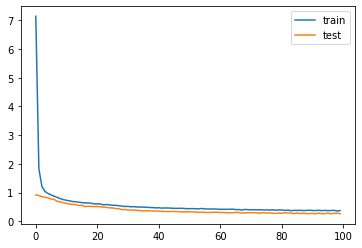

In [ ]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
# x_test의 결과를 추정한다.
y_pred = model.predict(x_test)

In [ ]:
# y_pred와 y_test 값을 원래의 값으로 복원한다.
y_pred_org = scaleY.inverse_transform(y_pred)
y_test_org = scaleY.inverse_transform(y_test)

In [ ]:
# 추정 결과를 육안으로 비교해 본다.
y_df = pd.DataFrame({'y_test':y_test_org.reshape(-1), 'y_pred':y_pred_org.reshape(-1)})
y_df.head(50)

,y_test,y_pred
0,185.0,180.392166
1,260.0,294.651703
2,286.0,180.294357
3,95.0,68.380585
4,172.0,159.230865
5,17.0,63.090145
6,133.0,114.247520
7,194.0,154.611115
8,134.0,216.741837
9,74.0,42.852886


In [ ]:
# R2 score를 측정한다. (log, 표준화된 상태에서 측정)
print('Log, 표준화 변환 상태 :')
print('RMSE = {:.4f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print(' R^2 = {:.4f}'.format(r2_score(y_test, y_pred)))

Log, 표준화 변환 상태 :
RMSE = 0.5149
 R^2 = 0.7079


In [ ]:
# 원래 데이터로 복원한 상태에서 측정
print('\n원래 데이터로 복원한 상태 :')
print('RMSE = {:.4f}'.format(np.sqrt(mean_squared_error(y_test_org, y_pred_org))))
print(' R^2 = {:.4f}'.format(r2_score(y_test_org, y_pred_org)))


원래 데이터로 복원한 상태 :
RMSE = 94.1214
 R^2 = 0.7079


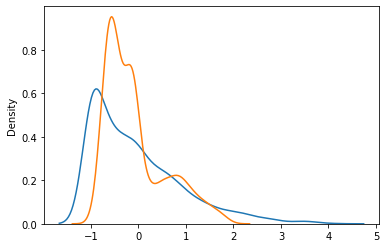

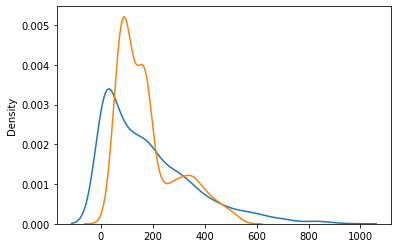

In [ ]:
sns.kdeplot(y_test.reshape(-1))
sns.kdeplot(y_pred.reshape(-1))
plt.show()

sns.kdeplot(y_test_org.reshape(-1))
sns.kdeplot(y_pred_org.reshape(-1))
plt.show()